In [107]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [108]:
dir_paths = {
    # 0
    "SNeRL": "exp_local/drawer-open-v2-2023-12-24_10-43-22-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    # 1
    "Random(scale=2000, lr=1e-3)": "exp_local/drawer-open-v2-2023-12-24_21-36-05-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.001-distscale2000",
    "Random(scale=2000, lr=1e-1)": "exp_local/drawer-open-v2-2023-12-22_03-43-38-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale2000",
    "Random(scale=2000, lr=1e-2)": "exp_local/drawer-open-v2-2024-01-03_13-14-28-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale2000",
    # 4
    "Random(scale=1000, lr=1e-3)": "exp_local/drawer-open-v2-2023-12-26_06-58-37-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.001-distscale1000",
    "Random(scale=1000, lr=1e-1)": "exp_local/drawer-open-v2-2023-12-25_08-41-14-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    "Random(scale=1000, lr=1e-2)": "exp_local/drawer-open-v2-2023-12-25_19-49-11-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale1000",
    # 7
    "Random(scale=100, lr=1e-3)": "exp_local/drawer-open-v2-2023-12-27_16-27-23-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.001-distscale100",
    "Random(scale=100, lr=1e-1)": "exp_local/drawer-open-v2-2023-12-26_18-08-05-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale100",
    "Random(scale=100, lr=1e-2)": "exp_local/drawer-open-v2-2023-12-27_05-17-36-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100",
    # 10
    "Encoder(scale=2000, lr=1e-1)": "exp_local/drawer-open-v2-2023-12-29_02-10-39-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.1-distscale2000",
    "Encoder(scale=2000, lr=1e-2)": "exp_local/drawer-open-v2-2023-12-29_13-59-34-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.01-distscale2000",
    "Encoder(scale=2000, lr=1e-3)": "exp_local/drawer-open-v2-2023-12-30_01-47-41-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.001-distscale2000",
    # 13
    "Encoder(scale=1000, lr=1e-1)": "exp_local/drawer-open-v2-2023-12-30_13-35-41-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.1-distscale1000",
    "Encoder(scale=1000, lr=1e-2)": "exp_local/drawer-open-v2-2023-12-31_01-24-27-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.01-distscale1000",
    "Encoder(scale=1000, lr=1e-3)": "exp_local/drawer-open-v2-2023-12-31_13-12-36-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.001-distscale1000",
    # 16
    "Encoder(scale=100, lr=1e-1)": "exp_local/drawer-open-v2-2024-01-01_01-02-04-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.1-distscale100",
    "Encoder(scale=100, lr=1e-2)": "exp_local/drawer-open-v2-2024-01-01_12-51-26-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.01-distscale100",
    "Encoder(scale=100, lr=1e-3)": "exp_local/drawer-open-v2-2024-01-02_00-40-46-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-encoder-distlr0.001-distscale100",
    # 19
    "SNeRL(seed=2)": "exp_local/drawer-open-v2-2024-01-09_18-33-28-im128-b128-s2-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    # 20
    "Random(seed=2, scale=1000, lr=1e-1)": "exp_local/drawer-open-v2-2024-01-10_05-29-06-im128-b128-s2-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 21
    "SNeRL(seed=3)": "exp_local/drawer-open-v2-2024-01-10_16-40-10-im128-b128-s3-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=3)": "exp_local/drawer-open-v2-2024-01-11_03-41-02-im128-b128-s3-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 23
    "SNeRL(seed=4)": "exp_local/drawer-open-v2-2024-01-12_12-27-58-im128-b128-s4-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=4)": "exp_local/drawer-open-v2-2024-01-12_23-54-27-im128-b128-s4-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 25
    "SNeRL(seed=5)": "exp_local/drawer-open-v2-2024-01-13_11-31-16-im128-b128-s5-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=5)": "exp_local/drawer-open-v2-2024-01-13_23-09-23-im128-b128-s5-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 27
    "SNeRL(seed=6)": "exp_local/drawer-open-v2-2024-01-14_10-55-09-im128-b128-s6-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=6)": "exp_local/drawer-open-v2-2024-01-14_22-50-50-im128-b128-s6-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 29
    "SNeRL(seed=7)": "exp_local/drawer-open-v2-2024-01-15_10-29-52-im128-b128-s7-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=7)": "exp_local/drawer-open-v2-2024-01-15_21-39-27-im128-b128-s7-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 31
    "SNeRL(seed=8)": "exp_local/drawer-open-v2-2024-01-16_08-51-13-im128-b128-s8-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=8)": "exp_local/drawer-open-v2-2024-01-16_19-49-13-im128-b128-s8-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 33
    "SNeRL(seed=9)": "exp_local/drawer-open-v2-2024-01-17_07-02-03-im128-b128-s9-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=9)": "exp_local/drawer-open-v2-2024-01-17_18-01-09-im128-b128-s9-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    # 35
    "SNeRL(seed=10)": "exp_local/drawer-open-v2-2024-01-18_05-11-43-im128-b128-s10-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=10)": "exp_local/drawer-open-v2-2024-01-18_16-09-49-im128-b128-s10-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
}

dir_paths_2 = {
    # 0
    "SNeRL": "exp_local/drawer-open-v2-2024-01-09_18-33-28-im128-b128-s2-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    # 1
    "Random(scale=1000, lr=1e-1)": "exp_local/drawer-open-v2-2024-01-10_05-29-06-im128-b128-s2-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",

}

#dir_paths = dir_paths_1

#legend = ["SNeRL", "Random(scfor i in range(1, MAX_SEQUENCE_LENGTH):
#le=2000, lr=1e-3)", "Random(scale=1000, lr=1e-1)", "Random(scale=1000, lr=1e-2)", "Random(scale=1000, lr=1e-3)", "Random(scale=100, lr=1e-1)", "Random(scale=100, lr=1e-2)", "Random(scale=100, lr=1e-3)"]
legend = np.array(list(dir_paths.keys()))
print(legend)
print(len(legend))

train_logs = []
eval_logs = []

for name, dir_path in dir_paths.items():
    train_logs.append({})
    eval_logs.append({})

    with open(f"../{dir_path}/train.log", "r") as file:
        lines = file.readlines()

        for line in lines:
            line_json = json.loads(line)

            if "episode_reward" in line_json:
                step = line_json["step"]
                train_logs[-1][step] = line_json

    with open(f"../{dir_path}/eval.log", "r") as file:
        lines = file.readlines()

        for line in lines:
            line_json = json.loads(line)

            if "episode_reward" in line_json:
                step = line_json["step"]
                eval_logs[-1][step] = line_json


['SNeRL' 'Random(scale=2000, lr=1e-3)' 'Random(scale=2000, lr=1e-1)'
 'Random(scale=2000, lr=1e-2)' 'Random(scale=1000, lr=1e-3)'
 'Random(scale=1000, lr=1e-1)' 'Random(scale=1000, lr=1e-2)'
 'Random(scale=100, lr=1e-3)' 'Random(scale=100, lr=1e-1)'
 'Random(scale=100, lr=1e-2)' 'Encoder(scale=2000, lr=1e-1)'
 'Encoder(scale=2000, lr=1e-2)' 'Encoder(scale=2000, lr=1e-3)'
 'Encoder(scale=1000, lr=1e-1)' 'Encoder(scale=1000, lr=1e-2)'
 'Encoder(scale=1000, lr=1e-3)' 'Encoder(scale=100, lr=1e-1)'
 'Encoder(scale=100, lr=1e-2)' 'Encoder(scale=100, lr=1e-3)'
 'SNeRL(seed=2)' 'Random(seed=2, scale=1000, lr=1e-1)' 'SNeRL(seed=3)'
 'Random(seed=3)' 'SNeRL(seed=4)' 'Random(seed=4)' 'SNeRL(seed=5)'
 'Random(seed=5)' 'SNeRL(seed=6)' 'Random(seed=6)' 'SNeRL(seed=7)'
 'Random(seed=7)' 'SNeRL(seed=8)' 'Random(seed=8)' 'SNeRL(seed=9)'
 'Random(seed=9)' 'SNeRL(seed=10)' 'Random(seed=10)']
37


In [116]:
# soccer

dir_paths = {
    # 0
    "SNeRL": "exp_local/soccer-v2-2024-02-12_10-50-01-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    # 1
    "Random(scale=100, lr=1e-1)": "exp_local/soccer-v2-2024-02-05_09-23-14-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale100",
    "Random(scale=100, lr=1e-2)": "exp_local/soccer-v2-2024-02-06_01-52-15-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100",
    "Random(scale=100, lr=1e-3)": "exp_local/soccer-v2-2024-02-06_18-21-21-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.001-distscale100",
    # 4
    "Random(scale=1000, lr=1e-1)": "exp_local/soccer-v2-2024-02-09_12-20-40-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale1000",
    "Random(scale=1000, lr=1e-2)": "exp_local/soccer-v2-2024-02-10_04-54-31-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale1000",
    "Random(scale=1000, lr=1e-3)": "exp_local/soccer-v2-2024-02-10_21-27-30-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.001-distscale1000",
    # 7
    "Random(scale=2000, lr=1e-1)": "exp_local/soccer-v2-2024-02-07_10-48-31-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.1-distscale2000",
    "Random(scale=2000, lr=1e-2)": "exp_local/soccer-v2-2024-02-08_03-18-51-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale2000",
    "Random(scale=2000, lr=1e-3)": "exp_local/soccer-v2-2024-02-10_21-27-30-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.001-distscale1000",
    # 10
    "Random(scale=50, lr=1e-2)": "exp_local/soccer-v2-2024-02-13_18-05-41-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale50",
    # 11
    "SNeRL(seed=2)": "exp_local/soccer-v2-2024-02-14_14-41-47-im128-b128-s2-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=2)": "exp_local/soccer-v2-2024-02-16_05-17-59-im128-b128-s2-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100",
    # 13
    "SNeRL(seed=3)": "exp_local/soccer-v2-2024-02-16_21-56-29-im128-b128-s3-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=3)": "exp_local/soccer-v2-2024-02-17_14-11-09-im128-b128-s3-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100",
    # 15
    "SNeRL(seed=4)": "exp_local/soccer-v2-2024-02-18_06-45-35-im128-b128-s4-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=4)": "exp_local/soccer-v2-2024-02-18_23-01-35-im128-b128-s4-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100",
    # 17
    "SNeRL(seed=5)": "exp_local/soccer-v2-2024-02-19_15-39-52-im128-b128-s5-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=5)": "exp_local/soccer-v2-2024-02-20_08-00-11-im128-b128-s5-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100",
    # 19
    "SNeRL(seed=6)": "exp_local/soccer-v2-2024-02-21_00-39-37-im128-b128-s6-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None",
    "Random(seed=6)": "exp_local/soccer-v2-2024-02-21_17-01-30-im128-b128-s6-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None-distillation-random-distlr0.01-distscale100"
}


#dir_paths = dir_paths_1

#legend = ["SNeRL", "Random(scale=2000, lr=1e-3)", "Random(scale=1000, lr=1e-1)", "Random(scale=1000, lr=1e-2)", "Random(scale=1000, lr=1e-3)", "Random(scale=100, lr=1e-1)", "Random(scale=100, lr=1e-2)", "Random(scale=100, lr=1e-3)"]
legend = np.array(list(dir_paths.keys()))
print(legend)
print(len(legend))

train_logs = []
eval_logs = []

for name, dir_path in dir_paths.items():
    train_logs.append({})
    eval_logs.append({})

    with open(f"../{dir_path}/train.log", "r") as file:
        lines = file.readlines()

        for line in lines:
            line_json = json.loads(line)

            if "episode_reward" in line_json:
                step = line_json["step"]
                train_logs[-1][step] = line_json

    with open(f"../{dir_path}/eval.log", "r") as file:
        lines = file.readlines()

        for line in lines:
            line_json = json.loads(line)

            if "episode_reward" in line_json:
                step = line_json["step"]
                eval_logs[-1][step] = line_json


['SNeRL' 'Random(scale=100, lr=1e-1)' 'Random(scale=100, lr=1e-2)'
 'Random(scale=100, lr=1e-3)' 'Random(scale=1000, lr=1e-1)'
 'Random(scale=1000, lr=1e-2)' 'Random(scale=1000, lr=1e-3)'
 'Random(scale=2000, lr=1e-1)' 'Random(scale=2000, lr=1e-2)'
 'Random(scale=2000, lr=1e-3)' 'Random(scale=50, lr=1e-2)' 'SNeRL(seed=2)'
 'Random(seed=2)' 'SNeRL(seed=3)' 'Random(seed=3)' 'SNeRL(seed=4)'
 'Random(seed=4)' 'SNeRL(seed=5)' 'Random(seed=5)' 'SNeRL(seed=6)'
 'Random(seed=6)']
21


In [110]:
window_len = 12 # convention is 30 for 1m steps, which corresponds to 12 in 400k
snerl_indices = [0, 19, 21, 23, 25, 29] #, 27, 31, 33, 35]
rnd_indices = [2, 12, 14, 16, 18, 20] #, 28, 32, 34, 36]
exp_indices = snerl_indices + rnd_indices #, 10, 13, 16]

for i in exp_indices:
    print(legend[i])

SNeRL


IndexError: index 19 is out of bounds for axis 0 with size 13

In [111]:
# soccer
window_len = 18 # convention is 30 for 1m steps, which corresponds to 12 in 400k
snerl_indices = [0, 11, 13, 15, 17, 19]
rnd_indices = [1, 2, 3, 10]
exp_indices = snerl_indices + rnd_indices #, 10, 13, 16]

for i in exp_indices:
    print(legend[i])

SNeRL
Random(scale=100, lr=1e-1)
Random(scale=100, lr=1e-2)
Random(scale=100, lr=1e-3)
Random(scale=50, lr=1e-2)


-554.1917046440972 -267.23961486816404
-723.2379272460938 -132.4117535909017
-1000.1727084689669 -182.89416809082027
-191.6722427368164 -173.96075625949436
-392.27880350748694 -112.76006927490235


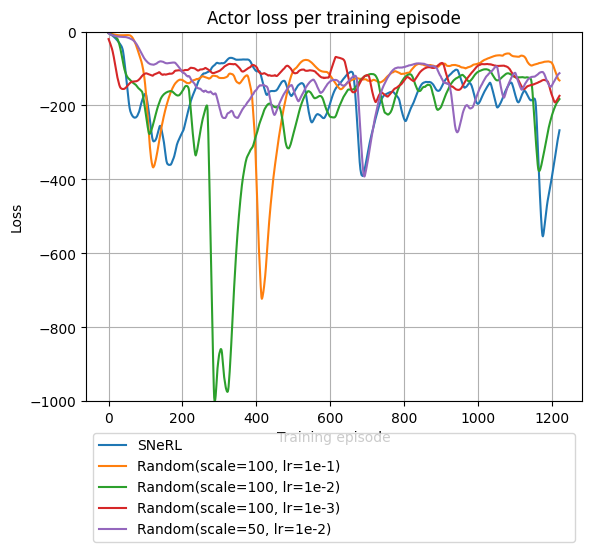

In [112]:
# actor loss
for i in exp_indices:
    train_log = train_logs[i]
    actor_losses = [log["actor_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
    actor_losses = [0, 0] + actor_losses

    sliding_actor_losses = np.lib.stride_tricks.sliding_window_view(actor_losses, (window_len,))
    sliding_stds = np.std(sliding_actor_losses, axis=1)
    #print(sliding_stds)
    actor_losses = np.convolve(actor_losses, np.ones(window_len)/window_len, mode='valid')
    error_upper = actor_losses + sliding_stds
    error_lower = actor_losses - sliding_stds
    print(np.min(actor_losses), np.mean(actor_losses[-1]))

    
    plt.plot(actor_losses)
    #plt.fill_between(range(len(actor_losses)), error_lower, error_upper, alpha=0.3)

plt.grid()
plt.title("Actor loss per training episode")    
plt.legend(legend[exp_indices], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
plt.xlabel("Training episode")
plt.ylabel("Loss")
plt.ylim((-1000, 0))
#plt.xlim((750, 840))
plt.show()

(6, 839)
(839,)
(839,)


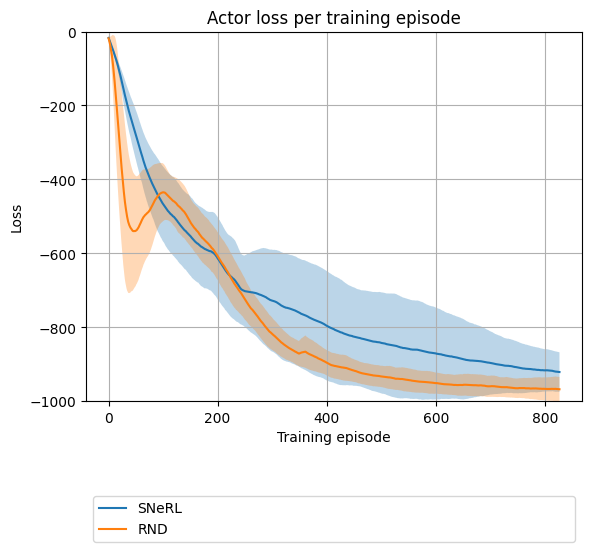

In [ ]:
fig, ax = plt.subplots()
snerls = []
for i in snerl_indices:
    train_log = train_logs[i]
    actor_losses = [log["actor_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
    actor_losses = [0, 0] + actor_losses
    snerls.append(actor_losses)

rnds = []
for i in rnd_indices:
    train_log = train_logs[i]
    actor_losses = [log["actor_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
    actor_losses = [0, 0] + actor_losses
    rnds.append(actor_losses)

snerls = np.stack(snerls)
rnds = np.stack(rnds)
print(snerls.shape)

snerl_std = snerls.std(axis=0)
rnd_std = rnds.std(axis=0)
print(snerl_std.shape)



snerls = np.mean(snerls, axis=0)
rnds = np.mean(rnds, axis=0)
print(snerls.shape)

snerl_error_lower = snerls - snerl_std
snerl_error_upper = snerls + snerl_std
rnd_error_lower = rnds - rnd_std
rnd_error_upper = rnds + rnd_std

snerls = np.convolve(snerls, np.ones(window_len)/window_len, mode='valid')
rnds = np.convolve(rnds, np.ones(window_len)/window_len, mode='valid')
snerl_error_lower = np.convolve(snerl_error_lower, np.ones(window_len)/window_len, mode='valid')
snerl_error_upper = np.convolve(snerl_error_upper, np.ones(window_len)/window_len, mode='valid')
rnd_error_lower = np.convolve(rnd_error_lower, np.ones(window_len)/window_len, mode='valid')
rnd_error_upper = np.convolve(rnd_error_upper, np.ones(window_len)/window_len, mode='valid')



snerl1 = ax.plot(snerls)
snerl2 = ax.fill_between(range(len(snerl_error_lower)), snerl_error_lower, snerl_error_upper, alpha=0.3, label="_nolegend_")
rnd1 = ax.plot(rnds)
rnd2 = ax.fill_between(range(len(rnd_error_lower)), rnd_error_lower, rnd_error_upper, alpha=0.3, label="_nolegend_")

ax.grid()
ax.set_title("Actor loss per training episode")    
ax.legend(["SNeRL", "RND"], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
ax.set_xlabel("Training episode")
ax.set_ylabel("Loss")
ax.set_ylim((-1000, 0))
#plt.xlim((750, 840))

plt.show()

376.2895263671875
402.39378051757814
1507.3428955078125
384.1155151367187
405.9852264404297
359.24772987365725
4722.480908203125
6045.3095703125
988.53603515625
1606.1519797325134
1948.9353759765625
3550.99892578125


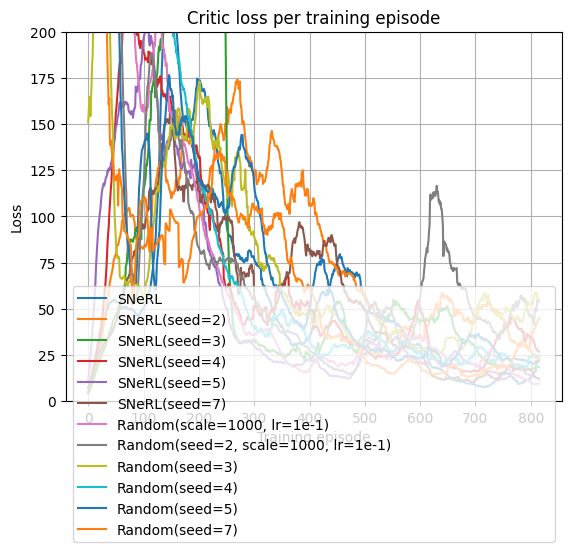

In [ ]:
# critic loss

for i in exp_indices:
    train_log = train_logs[i]
    critic_losses = [log["critic_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
    critic_losses = [0, 0] + critic_losses
    print(np.max(critic_losses))
    critic_losses = np.convolve(critic_losses, np.ones(2 * window_len)/(2 * window_len), mode='valid')
    plt.plot(critic_losses)



plt.title("Critic loss per training episode")
plt.grid()
plt.legend(legend[exp_indices], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
plt.xlabel("Training episode")
plt.ylabel("Loss")
plt.ylim((0, 200))
plt.show()

(6, 839)
(839,)
(839,)


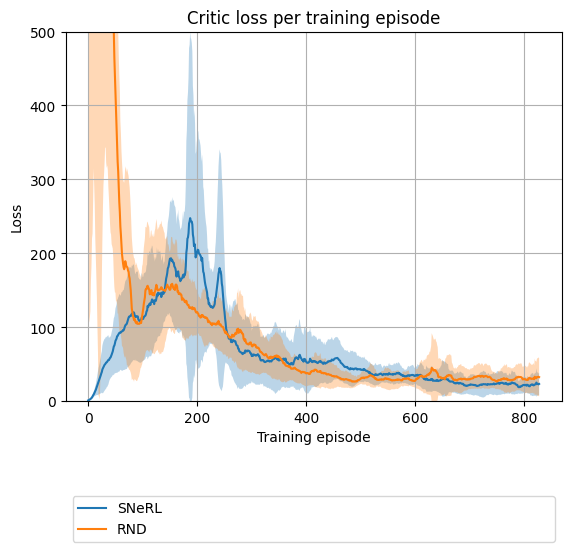

In [ ]:
fig, ax = plt.subplots()
snerls = []
for i in snerl_indices:
    train_log = train_logs[i]
    critic_losses = [log["critic_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
    critic_losses = [0, 0] + critic_losses
    snerls.append(critic_losses)

rnds = []
for i in rnd_indices:
    train_log = train_logs[i]
    critic_losses = [log["critic_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
    critic_losses = [0, 0] + critic_losses
    rnds.append(critic_losses)

snerls = np.stack(snerls)
rnds = np.stack(rnds)
print(snerls.shape)

snerl_std = snerls.std(axis=0)
rnd_std = rnds.std(axis=0)
print(snerl_std.shape)

snerls = np.mean(snerls, axis=0)
rnds = np.mean(rnds, axis=0)
print(snerls.shape)

snerl_error_lower = snerls - snerl_std
snerl_error_upper = snerls + snerl_std
rnd_error_lower = rnds - rnd_std
rnd_error_upper = rnds + rnd_std

snerls = np.convolve(snerls, np.ones(window_len)/window_len, mode='valid')
rnds = np.convolve(rnds, np.ones(window_len)/window_len, mode='valid')
snerl_error_lower = np.convolve(snerl_error_lower, np.ones(window_len)/window_len, mode='valid')
snerl_error_upper = np.convolve(snerl_error_upper, np.ones(window_len)/window_len, mode='valid')
rnd_error_lower = np.convolve(rnd_error_lower, np.ones(window_len)/window_len, mode='valid')
rnd_error_upper = np.convolve(rnd_error_upper, np.ones(window_len)/window_len, mode='valid')



snerl1 = ax.plot(snerls)
snerl2 = ax.fill_between(range(len(snerl_error_lower)), snerl_error_lower, snerl_error_upper, alpha=0.3, label="_nolegend_")
rnd1 = ax.plot(rnds)
rnd2 = ax.fill_between(range(len(rnd_error_lower)), rnd_error_lower, rnd_error_upper, alpha=0.3, label="_nolegend_")

ax.grid()
ax.set_title("Critic loss per training episode")    
ax.legend(["SNeRL", "RND"], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
ax.set_xlabel("Training episode")
ax.set_ylabel("Loss")
ax.set_ylim((0, 500))
#plt.xlim((750, 840))

plt.show()

SNeRL 354.6158201733552
Random(scale=100, lr=1e-1) 256.84587673854196
Random(scale=100, lr=1e-2) 268.4546414223406
Random(scale=100, lr=1e-3) 194.53095539891896
Random(scale=50, lr=1e-2) 347.3464939490307


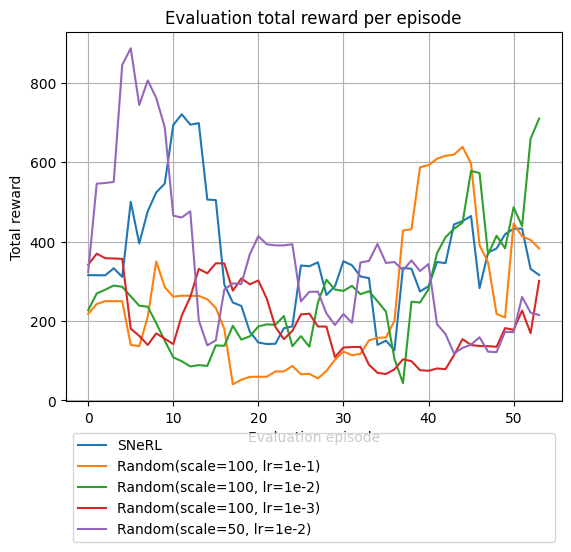

In [114]:
max_idx = 0
max_val = 0
for i in exp_indices:
    eval_log = eval_logs[i]
    eval_rewards = [log["mean_episode_reward"] for log in eval_log.values()]
    eval_rewards = np.convolve(eval_rewards, np.ones(int(window_len // 2))/(window_len // 2), mode='valid')
    print(legend[i], np.mean(eval_rewards))
    plt.plot(eval_rewards)


plt.title("Evaluation total reward per episode")
plt.grid()
plt.legend(legend[exp_indices], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
plt.xlabel("Evaluation episode")
plt.ylabel("Total reward")
plt.show()

(1, 62)
(62,)
(62,)


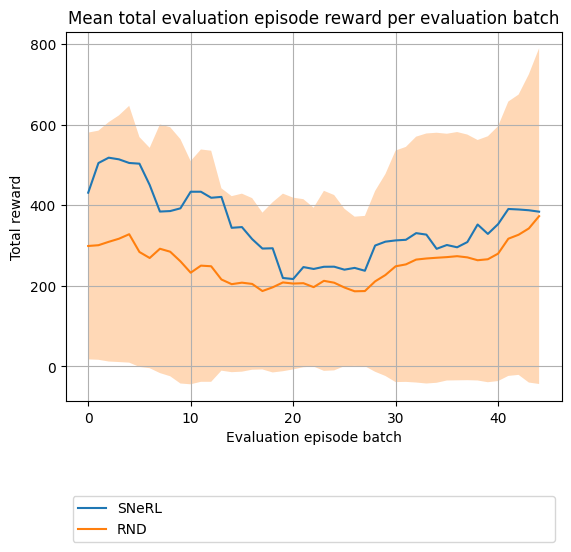

In [113]:
fig, ax = plt.subplots()
snerls = []
for i in snerl_indices:
    eval_log = eval_logs[i]
    eval_rewards = [log["mean_episode_reward"] for log in list(eval_log.values())] 
    snerls.append(eval_rewards)

rnds = []
for i in rnd_indices:
    eval_log = eval_logs[i]
    eval_rewards = [log["mean_episode_reward"] for log in list(eval_log.values())] 
    rnds.append(eval_rewards)

snerls = np.stack(snerls)
rnds = np.stack(rnds)
print(snerls.shape)

snerl_std = snerls.std(axis=0)
rnd_std = rnds.std(axis=0)
print(snerl_std.shape)

snerls = np.mean(snerls, axis=0)
rnds = np.mean(rnds, axis=0)
print(snerls.shape)

snerl_error_lower = snerls - snerl_std
snerl_error_upper = snerls + snerl_std
rnd_error_lower = rnds - rnd_std
rnd_error_upper = rnds + rnd_std

snerls = np.convolve(snerls, np.ones(window_len)/window_len, mode='valid')
rnds = np.convolve(rnds, np.ones(window_len)/window_len, mode='valid')
snerl_error_lower = np.convolve(snerl_error_lower, np.ones(window_len)/window_len, mode='valid')
snerl_error_upper = np.convolve(snerl_error_upper, np.ones(window_len)/window_len, mode='valid')
rnd_error_lower = np.convolve(rnd_error_lower, np.ones(window_len)/window_len, mode='valid')
rnd_error_upper = np.convolve(rnd_error_upper, np.ones(window_len)/window_len, mode='valid')



snerl1 = ax.plot(snerls)
snerl2 = ax.fill_between(range(len(snerl_error_lower)), snerl_error_lower, snerl_error_upper, alpha=0.3, label="_nolegend_")
rnd1 = ax.plot(rnds)
rnd2 = ax.fill_between(range(len(rnd_error_lower)), rnd_error_lower, rnd_error_upper, alpha=0.3, label="_nolegend_")

ax.grid()
ax.set_title("Mean total evaluation episode reward per evaluation batch")    
ax.legend(["SNeRL", "RND"], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
ax.set_xlabel("Evaluation episode batch")
ax.set_ylabel("Total reward")
#ax.set_ylim((0, 500))
#plt.xlim((750, 840))

plt.show()

SNeRL 3765.167651052147 4581.054937605429
SNeRL(seed=2) 3794.6638882023108 4457.591478119649
SNeRL(seed=3) 2730.095104857935 3924.5812152274425
SNeRL(seed=4) 4083.9169417507283 4492.324444498942
SNeRL(seed=5) 4156.144737572486 4450.925621333041
SNeRL(seed=7) 3923.4712781622165 4488.645607569596
Random(scale=1000, lr=1e-1) 3999.731836722095 4615.319832647883
Random(seed=2, scale=1000, lr=1e-1) 3752.210059565598 4485.700045593071
Random(seed=3) 3628.672283180381 4302.7859837568285
Random(seed=4) 3876.0598376215207 4527.1311144640395
Random(seed=5) 3742.959843802611 4502.1725218283245
Random(seed=7) 3624.2380331537206 4514.205013354443


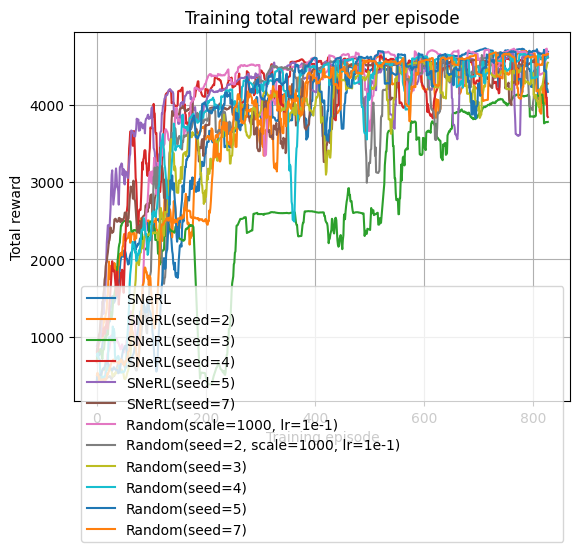

In [ ]:
for i in exp_indices:
    train_log = train_logs[i]

    if i in snerl_indices:
        train_rewards = [log["episode_reward"] for log in train_log.values()]
        plt.title("Training total reward per episode (base model)")
    else:
        train_rewards = [log["raw_episode_reward"] for log in train_log.values()]
        plt.title("Training total reward per episode")
    
    train_rewards = np.convolve(train_rewards, np.ones(window_len)/(window_len), mode='valid')
    print(legend[i], np.mean(train_rewards), np.mean(train_rewards[-200:]))

    plt.plot(train_rewards)

plt.grid()

plt.legend(legend[exp_indices], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
plt.xlabel("Training episode")
plt.ylabel("Total reward")
#plt.ylim(3700, 5000)
#plt.xlim(780, 800)
plt.show()


(1, 1239)
(1239,)
(1239,)


IndexError: index -3 is out of bounds for axis 0 with size 1

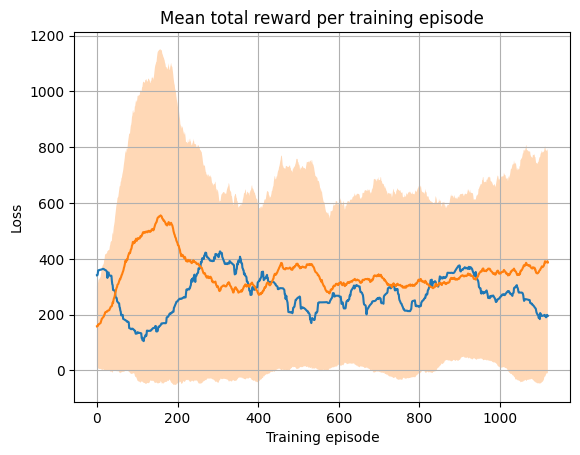

In [115]:
window_len = 120
fig, ax = plt.subplots()
snerls = []
for i in snerl_indices:
    train_log = train_logs[i]
    train_rewards = [log["episode_reward"] for log in list(train_log.values())] 
    snerls.append(train_rewards)

rnds = []
for i in rnd_indices:
    train_log = train_logs[i]
    train_rewards = [log["raw_episode_reward"] for log in list(train_log.values())] 
    rnds.append(train_rewards)

snerls = np.stack(snerls)
rnds = np.stack(rnds)
print(snerls.shape)

snerl_std = snerls.std(axis=0)
rnd_std = rnds.std(axis=0)
print(snerl_std.shape)

all_snerls = snerls.copy()
snerls = np.mean(snerls, axis=0)
all_rnds = rnds.copy()
rnds = np.mean(rnds, axis=0)
print(snerls.shape)

snerl_error_lower = snerls - snerl_std
snerl_error_upper = snerls + snerl_std
rnd_error_lower = rnds - rnd_std
rnd_error_upper = rnds + rnd_std

snerls = np.convolve(snerls, np.ones(window_len)/window_len, mode='valid')
rnds = np.convolve(rnds, np.ones(window_len)/window_len, mode='valid')
snerl_error_lower = np.convolve(snerl_error_lower, np.ones(window_len)/window_len, mode='valid')
snerl_error_upper = np.convolve(snerl_error_upper, np.ones(window_len)/window_len, mode='valid')
rnd_error_lower = np.convolve(rnd_error_lower, np.ones(window_len)/window_len, mode='valid')
rnd_error_upper = np.convolve(rnd_error_upper, np.ones(window_len)/window_len, mode='valid')

snerl1 = ax.plot(snerls)
snerl2 = ax.fill_between(range(len(snerl_error_lower)), snerl_error_lower, snerl_error_upper, alpha=0.3, label="_nolegend_")
rnd1 = ax.plot(rnds)
rnd2 = ax.fill_between(range(len(rnd_error_lower)), rnd_error_lower, rnd_error_upper, alpha=0.3, label="_nolegend_")

ax.grid()
ax.set_title("Mean total reward per training episode")    
ax.set_xlabel("Training episode")
ax.set_ylabel("Loss")
#ax.set_ylim((0, 500))
#plt.xlim((750, 840))

last_snerl = np.convolve(all_snerls[-3], np.ones(window_len)/window_len, mode='valid')
last_rnd = np.convolve(all_rnds[-3], np.ones(window_len)/window_len, mode='valid')

#ax.plot(last_snerl)
#ax.plot(last_rnd)
ax.legend(["SNeRL", "RND", "a", "b"], loc="lower left", mode="expand", bbox_to_anchor = (0, -0.4, 1, 0.2))
plt.show()

print("SNeRL mean:", np.mean(snerls[-100:]))
print("RND mean:", np.mean(rnds[-100:]))

# Effect of Distillation Type